In [640]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [641]:
df_train=pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

**Data Exploration**

In [642]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [643]:

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [644]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [645]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

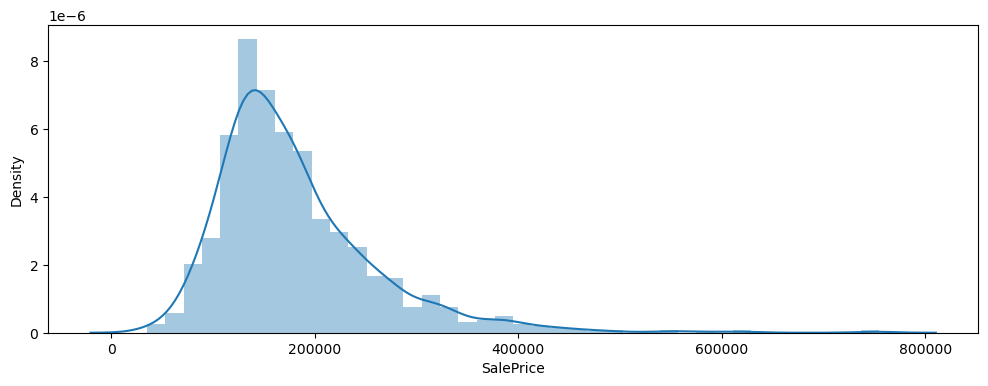

In [646]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['SalePrice'],kde=True,bins=40)
plt.tight_layout

In [647]:
df_train_with_nulls = df_train[df_train.columns[df_train.isnull().sum() > 0]]
train_null_counts = df_train_with_nulls.isnull().sum()
100* train_null_counts/len(df_train)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [648]:
percent_missing = 100 * df_train.isnull().sum() / len(df_train)
print(percent_missing[percent_missing > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


<Axes: >

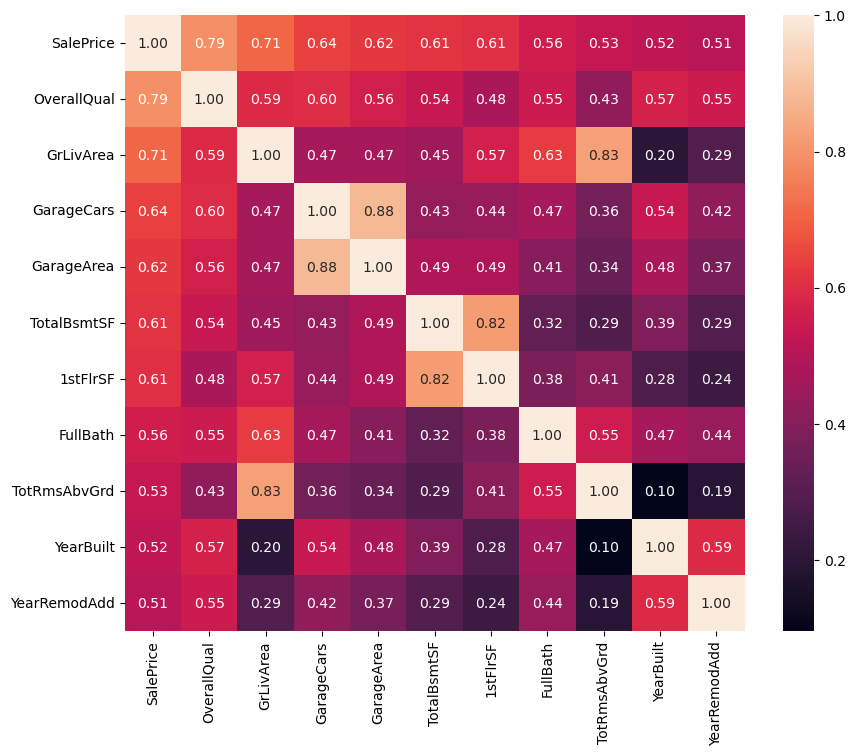

In [649]:
top_corr_features = df_train.select_dtypes(include='number').corr()['SalePrice'].nlargest(11).index
corr_matrix = df_train[top_corr_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cbar=True, annot=True, fmt=".2f")

In [650]:
corr_values = df_train[top_corr_features].corr()['SalePrice'].drop('SalePrice')
corr_values

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

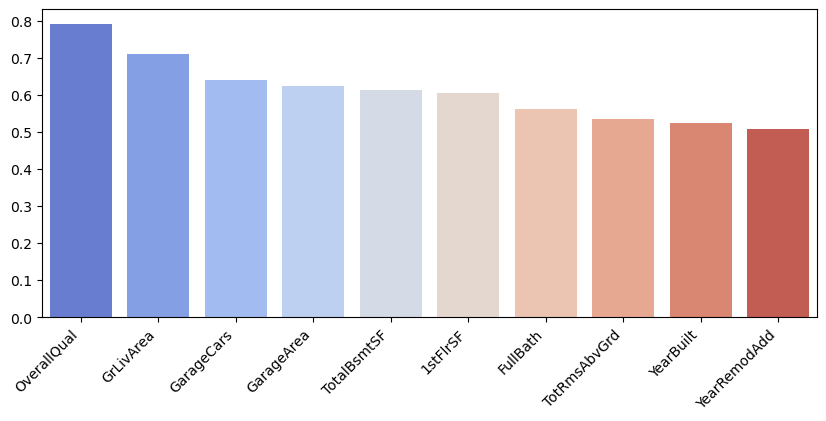

In [651]:
plt.figure(figsize=(10, 4))
sns.barplot(x=top_corr_features.drop('SalePrice'),
            y=corr_matrix.loc['SalePrice', top_corr_features].drop('SalePrice').values, palette='coolwarm')
plt.xticks(rotation=45, ha='right');

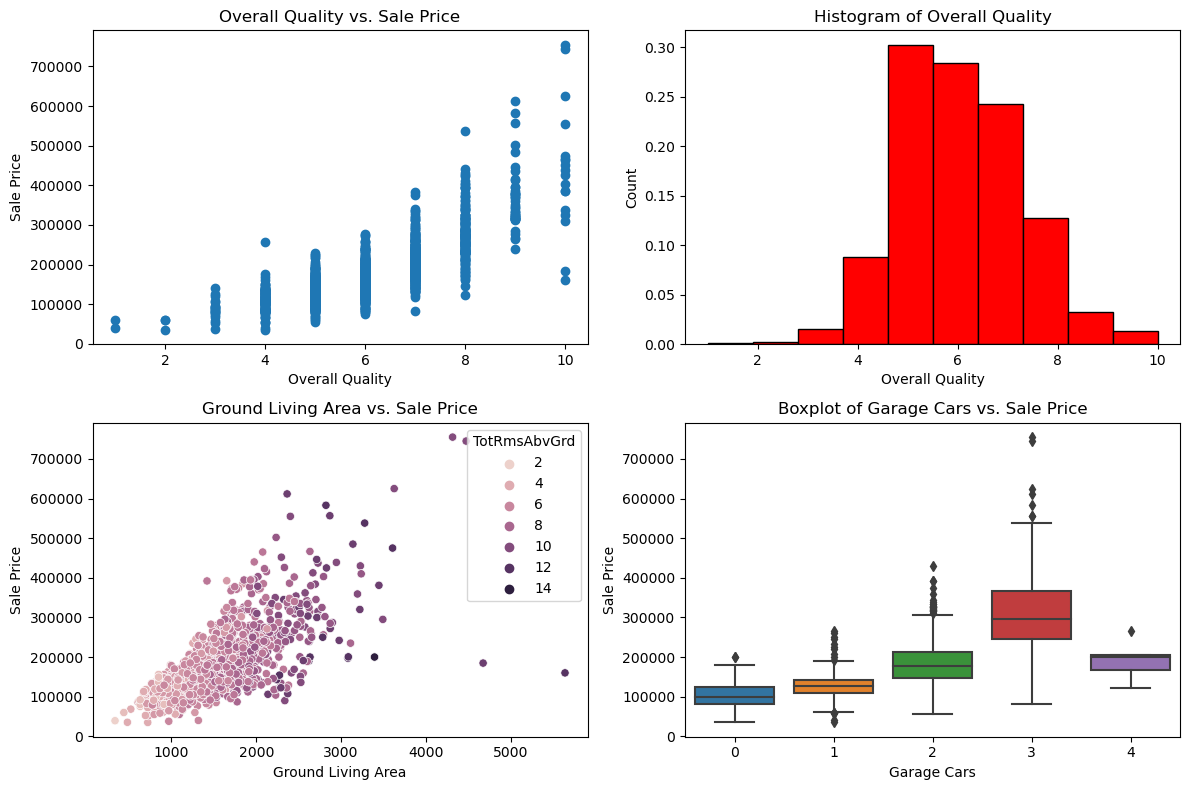

In [652]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize for better spacing

# Overall Quality vs. Sale Price
axes[0, 0].scatter(x=df_train['OverallQual'], y=df_train['SalePrice'])
axes[0, 0].set_xlabel('Overall Quality')
axes[0, 0].set_ylabel('Sale Price')
axes[0, 0].set_title('Overall Quality vs. Sale Price')

# Histogram of Overall Quality
axes[0, 1].hist(df_train['OverallQual'], bins=10, density=True, color='red', edgecolor='black')
axes[0, 1].set_xlabel('Overall Quality')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Histogram of Overall Quality')

# Ground Living Area vs. Sale Price with hue
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, hue='TotRmsAbvGrd', ax=axes[1, 0])
axes[1, 0].set_xlabel('Ground Living Area')
axes[1, 0].set_ylabel('Sale Price')
axes[1, 0].set_title('Ground Living Area vs. Sale Price')

# BoxPlot of Garage Cars
sns.boxplot(x='GarageCars', y='SalePrice', data=df_train, ax=axes[1, 1])
axes[1, 1].set_xlabel('Garage Cars')
axes[1, 1].set_ylabel('Sale Price')
axes[1, 1].set_title('Boxplot of Garage Cars vs. Sale Price')

plt.tight_layout()

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

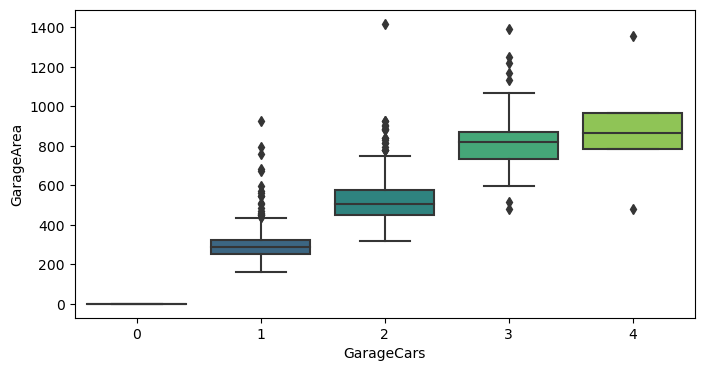

In [653]:
plt.figure(figsize=(8, 4))
#sns.violinplot(x='GarageCars', y='GarageArea', data=df_train, palette='viridis')
sns.boxplot(x='GarageCars', y='GarageArea',  data=df_train, palette='viridis')

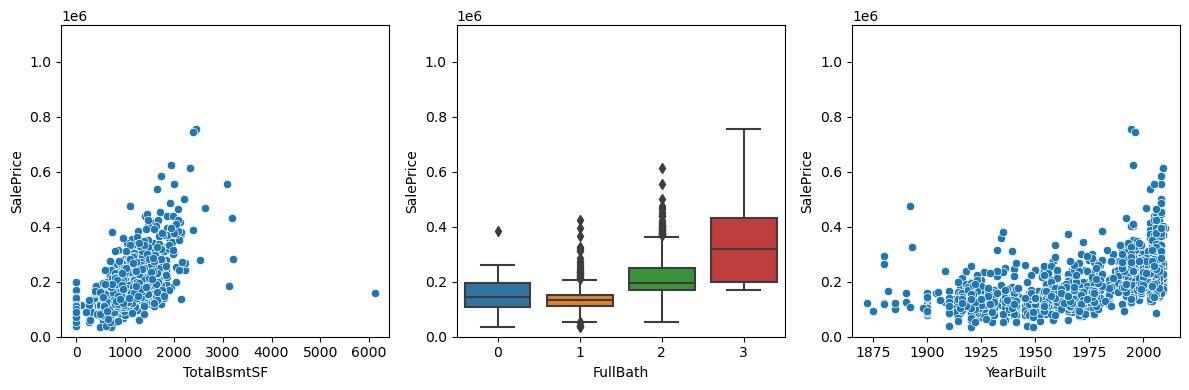

In [654]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice', ax=axes[0]) 
axes[0].set_ylim(bottom=0, top=df_train['SalePrice'].max() * 1.5)

sns.boxplot(data=df_train,  x='FullBath', y='SalePrice', ax=axes[1])
axes[1].set_ylim(bottom=0, top=df_train['SalePrice'].max() * 1.5)

sns.scatterplot(data=df_train, x='YearBuilt', y='SalePrice', ax=axes[2])
axes[2].set_ylim(bottom=0, top=df_train['SalePrice'].max() * 1.5)

plt.tight_layout()

**Data Preprocessing and Feature Engineering**

In [655]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Missing Data**

In [656]:
percent_missing = 100 * df_train.isnull().sum() / len(df_train)
print(percent_missing[percent_missing > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [657]:
percent_missing_test = 100 * df_test.isnull().sum() / len(df_test)
print(percent_missing_test[percent_missing_test > 0])

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64


In [658]:
df_train['LotFrontage'].fillna(0, inplace=True)
df_train['GarageYrBlt'].fillna(0, inplace=True)

In [659]:
df_test['LotFrontage'].fillna(0, inplace=True)
df_test['GarageYrBlt'].fillna(0, inplace=True)

In [660]:
df_train[df_train['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [661]:
df_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [662]:
df_train[['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2']] =df_train[['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2']].fillna('None')

In [663]:
df_test[['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2']] =df_test[['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2']].fillna('None')

In [664]:
df_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

In [665]:
df_test['BsmtQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'None'], dtype=object)

In [666]:
percent_missing = 100 * df_train.isnull().sum() / len(df_train)
print(percent_missing[percent_missing > 0])

Alley           93.767123
MasVnrArea       0.547945
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [667]:
df_train[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu', 'Fence']]= df_train[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu', 'Fence']].fillna('None')

In [668]:
df_test[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu', 'Fence']]= df_test[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu', 'Fence']].fillna('None')

In [669]:
percent_missing = 100 * df_train.isnull().sum() / len(df_train)
print(percent_missing[percent_missing > 0])

Alley          93.767123
MasVnrArea      0.547945
Electrical      0.068493
PoolQC         99.520548
MiscFeature    96.301370
dtype: float64


In [670]:
df_train.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)
df_test.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)

In [671]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [672]:
#df_train.drop('Id', axis=1, inplace=True)
#df_test.drop('Id', axis=1, inplace=True)

In [673]:
percent_missing = 100 * df_train.isnull().sum() / len(df_train)
print(percent_missing[percent_missing > 0])


Series([], dtype: float64)


In [674]:
percent_missing_test = 100 * df_test.isnull().sum() / len(df_test)
print(percent_missing_test[percent_missing_test > 0])

Series([], dtype: float64)


In [675]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,None,0,12,2008,WD,Normal,250000


In [676]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,None,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,None,0,1,2010,WD,Normal


**Categorical Variables**

In [677]:
df_train.select_dtypes(['object']).columns  #identifying categorical data

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [678]:
df_train[df_train['Condition1']!= df_train['Condition2']][['Condition1', 'Condition2']].head()

,Condition1,Condition2
1,Feedr,Norm
7,PosN,Norm
8,Artery,Norm
18,RRAe,Norm
29,Feedr,RRNn


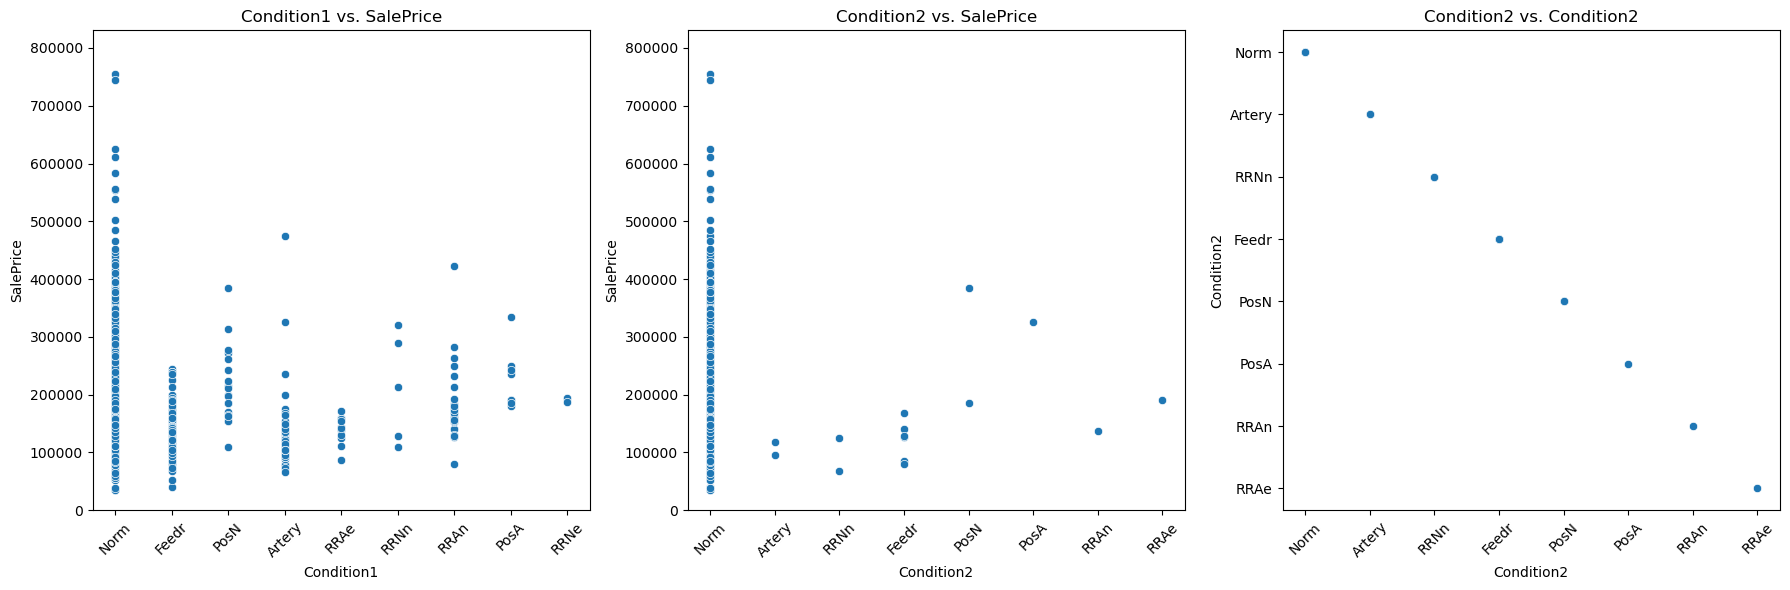

In [679]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Increase figure size for better spacing

sns.scatterplot(x='Condition1', y='SalePrice', data=df_train, ax=axes[0]) 
axes[0].set_ylim(bottom=0, top=df_train['SalePrice'].max() * 1.1)
axes[0].set_title('Condition1 vs. SalePrice')
axes[0].tick_params(axis='x', rotation=45)

sns.scatterplot(data=df_train, x='Condition2', y='SalePrice', ax=axes[1])
axes[1].set_ylim(bottom=0, top=df_train['SalePrice'].max() * 1.1)
axes[1].set_title('Condition2 vs. SalePrice')
axes[1].tick_params(axis='x', rotation=45)

sns.scatterplot(data=df_train, x='Condition2', y='Condition2', ax=axes[2])
axes[2].set_title('Condition2 vs. Condition2')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [680]:
y = df_train['SalePrice']
X = df_train.drop('SalePrice', axis=1)

In [681]:
combined_df = pd.concat([X, df_test], keys=['train', 'test'])

In [682]:
combined_df = pd.get_dummies(combined_df, drop_first=True)

In [683]:
combined_df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
train 0        1          60         65.0     8450            7            5   
      1        2          20         80.0     9600            6            8   
      2        3          60         68.0    11250            7            5   
      3        4          70         60.0     9550            7            5   
      4        5          60         84.0    14260            8            5   
...          ...         ...          ...      ...          ...          ...   
test  1454  2915         160         21.0     1936            4            7   
      1455  2916         160         21.0     1894            4            5   
      1456  2917          20        160.0    20000            5            7   
      1457  2918          85         62.0    10441            5            5   
      1458  2919          60         74.0     9627            7            5   

            YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  \
train 0          2003          2003       196.0       706.0  ...   
      1          1976          1976         0.0       978.0  ...   
      2          2001          2002       162.0       486.0  ...   
      3          1915          1970         0.0       216.0  ...   
      4          2000          2000       350.0       655.0  ...   
...               ...           ...         ...         ...  ...   
test  1454       1970          1970         0.0         0.0  ...   
      1455       1970          1970         0.0       252.0  ...   
      1456       1960          1996         0.0      1224.0  ...   
      1457       1992          1992         0.0       337.0  ...   
      1458       1993          1994        94.0       758.0  ...   

            SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
train 0              False           False         False         False   
      1              False           False         False         False   
      2              False           False         False         False   
      3              False           False         False         False   
      4              False           False         False         False   
...                    ...             ...           ...           ...   
test  1454           False           False         False         False   
      1455           False           False         False         False   
      1456           False           False         False         False   
      1457           False           False         False         False   
      1458           False           False         False         False   

            SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
train 0            True                  False                 False   
      1            True                  False                 False   
      2            True                  False                 False   
      3            True                  False                 False   
      4            True                  False                 False   
...                 ...                    ...                   ...   
test  1454         True                  False                 False   
      1455         True                  False                 False   
      1456         True                  False                 False   
      1457         True                  False                 False   
      1458         True                  False                 False   

            SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
train 0                    False                  True                  False  
      1                    False                  True                  False  
      2                    False                  True                  False  
      3                    False                 False                  False  
      4                    False                  True                  False  
..

In [684]:
X = combined_df.xs('train')
df_test = combined_df.xs('test')

In [685]:
print(X.shape)
print(df_test.shape)

(1451, 251)
(1432, 251)


**Train Test Split**

In [686]:
from sklearn.model_selection import train_test_split

In [687]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=101)


**Data Normalization**

In [688]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)

**Machine Lerning Models**

In [689]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



# Model dictionary
models = {
    'DecisionTree': DecisionTreeRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
}

In [690]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=2)]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, None]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [691]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid, n_iter=30, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Add RandomizedSearchCV to models dictionary
models['RandomForest'] = rf_random

**Models Evaluation**

In [692]:
model_performance_score = {}
model_performance_model= {}

for name, model in models.items():
    
    #trainign model
    model.fit(X_train, y_train)
    model_performance_model[name]= model
    
    #evaluating model
    score = model.score(X_val, y_val)
    model_performance_score[name] = score
    
    #printing model performance
    print(f"{name} Score: {score}")

DecisionTree Score: 0.727405553481234
Ridge Score: 0.7095684633977095
Lasso Score: 0.5987480565053216
Fitting 10 folds for each of 30 candidates, totalling 300 fits
RandomForest Score: 0.8341795500090092


In [693]:

predictions = pd.DataFrame(
    {'DecisionTree': model_performance_model['DecisionTree'].predict(X_val),
     'Ridge': model_performance_model['Ridge'].predict(X_val),
     'Lasso': model_performance_model['Lasso'].predict(X_val),
     'RandomForest': model_performance_model['RandomForest'].predict(X_val)
    })

predictions

,DecisionTree,Ridge,Lasso,RandomForest
0,423000.0,268263.228306,281837.810336,289269.774
1,179665.0,200817.252518,194029.134961,199615.339
2,153500.0,138144.924955,136813.577558,137098.338
3,153575.0,131267.698314,124404.362757,118773.774
4,142600.0,153154.011579,158044.299386,168385.152
...,...,...,...,...
286,158500.0,135112.238989,133896.125972,135268.675
287,278000.0,382573.956559,391230.450385,321397.004
288,131000.0,159614.094454,152519.785677,146770.041
289,75500.0,64945.753840,63434.755302,90145.515


In [694]:
best_model_name = max(model_performance_score, key=model_performance_score.get)
best_model = models[best_model_name]

In [695]:
best_model


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 1000]},
                   random_state=42, verbose=2)

In [696]:
# Randomforest with the best model performance
rf_prediction_val = model_performance_model['RandomForest'].predict(X_val)

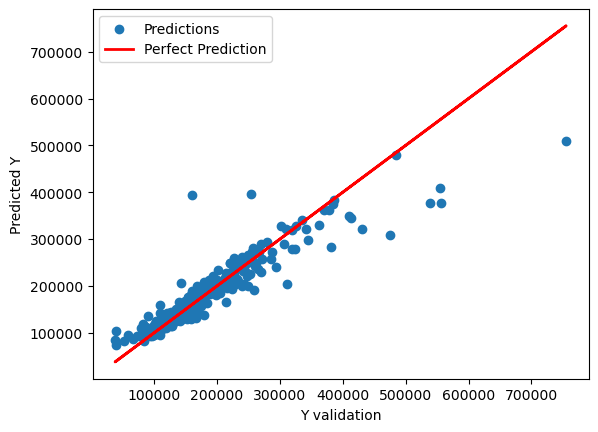

In [697]:
plt.scatter(y_val, rf_prediction_val, label='Predictions')  # Add label to scatter plot
plt.plot(y_val, y_val, color='red', linestyle='-', linewidth=2, label='Perfect Prediction')  # Add label to perfect prediction line
plt.xlabel('Y validation')
plt.ylabel('Predicted Y')
plt.legend()

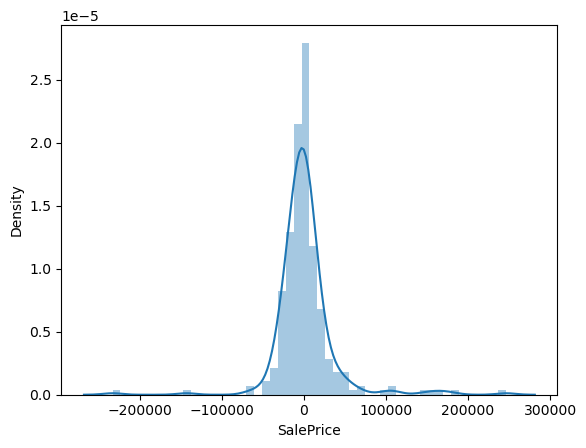

In [698]:
sns.distplot((y_val-rf_prediction_val),bins=50);

**Test data prediction**

In [699]:
scaled_df_test = scaler.transform(df_test)

In [700]:
predictions = model_performance_model['RandomForest'].predict(scaled_df_test)
predictions

array([125760.816, 153071.07 , 183119.614, ..., 165912.421, 107490.134,
       222943.765])

In [707]:
PriceEstimated = pd.DataFrame({"Id": df_test["Id"], "SalePrice": predictions.reshape(-1)})
PriceEstimated.to_csv("House_Price_prediction_submission.csv", index=False)